In [1]:
import numpy as np
import matplotlib.pyplot as plt
from umap import UMAP

from sklearn.decomposition import PCA

In [2]:
biff = np.loadtxt("/Users/bbrener1/haxx/RNAForecasterPaperCode/BoolODE/maybe_bifur.tsv")

In [3]:
# !head /Users/bbrener1/haxx/RNAForecasterPaperCode/BoolODE/maybe_bifur.tsv
# !wc -l /Users/bbrener1/haxx/RNAForecasterPaperCode/BoolODE/maybe_bifur.tsv

In [4]:
biff[0]

array([0.00598702, 0.00792303, 0.01495655, 0.01567991, 0.01      ,
       0.00717269, 0.10773795, 1.1273386 ])

In [5]:
biff[1]

array([0.00780563, 0.00222643, 0.00338211, 0.01324134, 0.00572541,
       0.00387277, 0.17873235, 0.9268243 ])

In [6]:
# Every 800 rows are a complete time course of a single cell, every other 800th row is the next cell for a particular time point. 
biff_r = np.reshape(biff,(2000,800,8))

In [7]:
biff_r[:,0,0]

array([0.00598702, 0.01      , 0.00573146, ..., 0.00074994, 0.00089595,
       0.00651659])

In [8]:
biff_r[:,1,0]

array([0.00780563, 0.00168218, 0.00573146, ..., 0.00314855, 0.0082225 ,
       0.00843232])

In [16]:
# We grab every 5th timepoint here, so now we have 160 time points instead of 800)
# small_biff = biff_r[:,::5,:]

# small_biff = biff_r[:,600:,:]

small_biff = biff_r

small_biff.shape

(2000, 800, 8)

In [17]:
# Let's also grab every 40th cell so we have 50 instead of 2000

cell_shuffle = np.arange(small_biff.shape[0])
np.random.shuffle(cell_shuffle)

tiny_biff = small_biff[cell_shuffle]

tiny_biff = tiny_biff[::40,:,:]

tiny_biff.shape

(50, 800, 8)

In [18]:
cells,time,genes = tiny_biff.shape

flat = np.reshape(tiny_biff,(cells*time,genes))

flat.shape

(40000, 8)

In [19]:
flat[0]

array([0.01504013, 0.02194365, 0.006826  , 0.03809465, 0.01102832,
       0.01944826, 0.10938342, 1.0918926 ])

In [20]:
time_marker = np.array([np.arange(time) for _ in range(cells)])

In [23]:
transformed = UMAP(n_neighbors=20,min_dist=.5,spread=1,metric='correlation').fit_transform(flat)

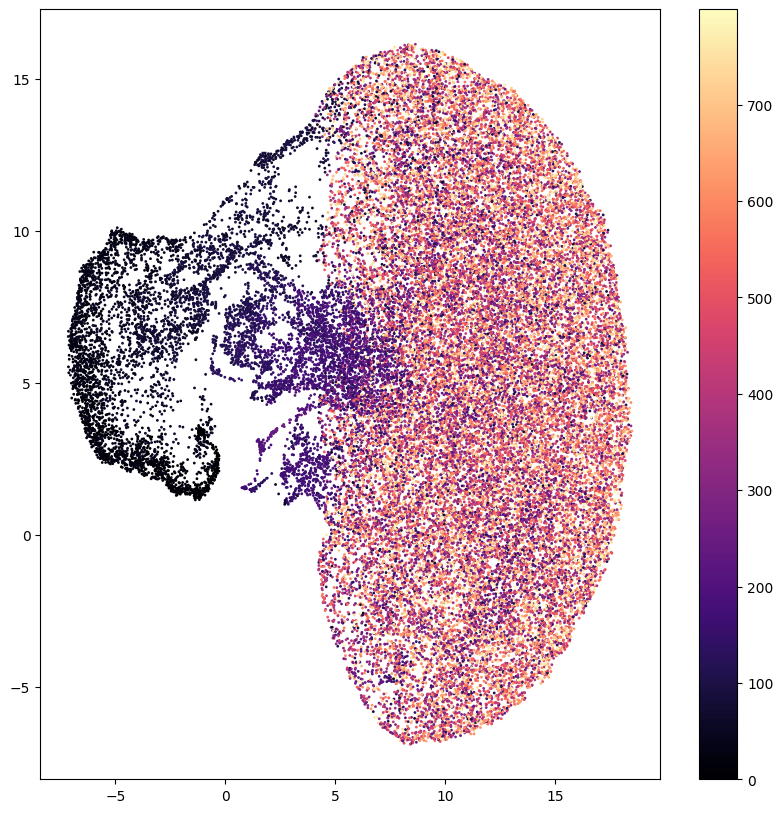

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(
    *transformed.T,
    s=1,
    c=time_marker,
    cmap='magma')
plt.colorbar()
plt.show()

In [ ]:
# We should obtain a velocity here for each timepoint 

# Then we can plot it via UMAP trickery, but also train a network on it. 